In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect= True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station



In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent=(session.query(measurement.date).order_by(measurement.date.desc()).first())
most_recent

('2017-08-23')

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
most_recent_1yr_timeframe = dt.date(2017,8,23) - dt.timedelta(days=365)
print(most_recent_1yr_timeframe)

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores

percip_query_1 = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= '2016-08-24', measurement.date <= '2017-08-23').\
        order_by(measurement.date).all()
percip_query_1

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
percip_q1_df = pd.DataFrame(data=percip_query_1)
percip_q1_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [13]:
# Sort the dataframe by date
percip_q1_df = percip_q1_df.sort_values(by = "date")
percip_q1_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


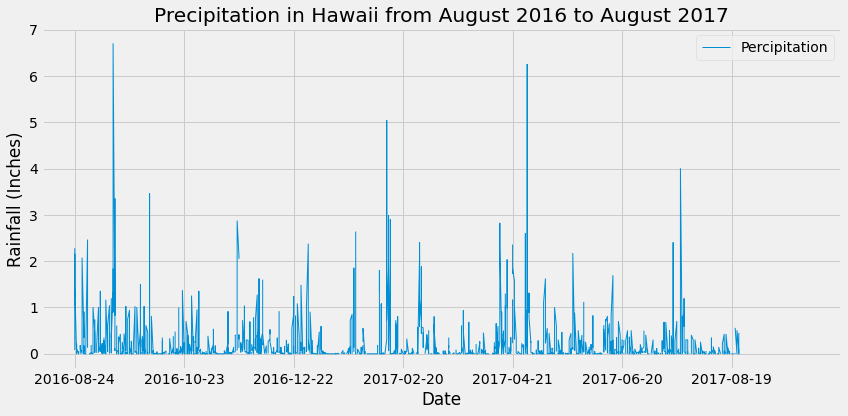

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

date_ticks=[0,60,120,180,240,300,360,420]

df=pd.DataFrame(data=percip_q1_df)
plt.figure(figsize = (12,6))
plt.plot(df['date'], df['prcp'], linewidth = 1)
plt.title("Precipitation in Hawaii from August 2016 to August 2017")
plt.xlabel('Date')
plt.xticks(date_ticks)
plt.ylabel('Rainfall (Inches)')
plt.legend(['Percipitation'])
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_q1_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
sum_station=session.query(station).distinct().count()
print(f'There are {sum_station} stations at Honolulu, Hawaii.')

There are 9 stations at Honolulu, Hawaii.


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity=(session.query(measurement.station,func.count(measurement.station))
                         .group_by(measurement.station)
                         .order_by(func.count(measurement.station).desc())
                         .all())

for query in station_activity:
    print(f"Station {query[0]} has {query[1]} records")

Station USC00519281 has 2772 records
Station USC00519397 has 2724 records
Station USC00513117 has 2709 records
Station USC00519523 has 2669 records
Station USC00516128 has 2612 records
Station USC00514830 has 2202 records
Station USC00511918 has 1979 records
Station USC00517948 has 1372 records
Station USC00518838 has 511 records


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'

summary_most_active = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active).all()
print(f"{most_active} has the minimum temperature of {summary_most_active[0][0]} Fahrenheit")
print(f"{most_active} has the maximum temperature of {summary_most_active[0][1]} Fahrenheit")
print(f"{most_active} has an average tempature of {summary_most_active[0][2]} Fahrenheit")

USC00519281 has the minimum temperature of 54.0 Fahrenheit
USC00519281 has the maximum temperature of 85.0 Fahrenheit
USC00519281 has an average tempature of 71.66378066378067 Fahrenheit


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_annual_temp = session.query(measurement.date, measurement.tobs).filter(measurement.station == most_active).\
    filter(func.strftime("%Y-%m-%d", measurement.date) >= dt.date(2016, 8, 23)).all()


In [34]:
#load into dataframe
active_annual_temp_df = pd.DataFrame(active_annual_temp)

active_annual_temp_df = active_annual_temp_df.set_index("date")

active_annual_temp_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


In [36]:
#sort date
active_annual_temp_df = active_annual_temp_df.sort_values(by = "date")
active_annual_temp_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


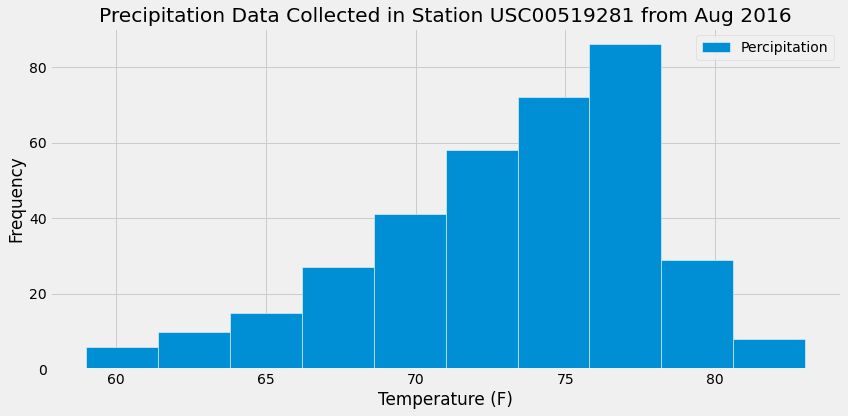

In [50]:

df=pd.DataFrame(data=active_annual_temp)
plt.figure(figsize = (12,6))
plt.hist( df['tobs'], edgecolor = 'white')
plt.title("Precipitation Data Collected in Station USC00519281 from Aug 2016")
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(['Percipitation'])
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()